# Final for dataming with competition: Binary Classification with a Bank Churn Dataset

**Link do dataset: https://www.kaggle.com/competitions/playground-series-s4e1/data?select=train.csv**

- In this task, we will implement a model which will predict if a customer continues with their account or closes it.

# Code

In [ ]:

# Import những thư viện cần thiết
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train_data = pd.DataFrame(pd.read_csv('data/train.csv', index_col=['id']))

In [ ]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [ ]:
train_data.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [ ]:
train_data = train_data.drop(['CustomerId', 'Surname'], axis=1)
train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [ ]:
train_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
train_data.duplicated().sum()

123

In [ ]:
train_data=train_data.drop_duplicates()

In [ ]:
train_data.duplicated().sum()

0

## Data Exploring

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164911 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      164911 non-null  int64  
 1   Geography        164911 non-null  object 
 2   Gender           164911 non-null  object 
 3   Age              164911 non-null  float64
 4   Tenure           164911 non-null  int64  
 5   Balance          164911 non-null  float64
 6   NumOfProducts    164911 non-null  int64  
 7   HasCrCard        164911 non-null  float64
 8   IsActiveMember   164911 non-null  float64
 9   EstimatedSalary  164911 non-null  float64
 10  Exited           164911 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.1+ MB


In [ ]:
train_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000
mean,656.468914,38.124278,5.020599,55481.138955,1.554420,0.753916,0.497693,112579.798396,0.211684
std,80.091065,8.865020,2.806237,62819.233625,0.547171,0.430730,0.499996,50290.229424,0.408503
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74639.870000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

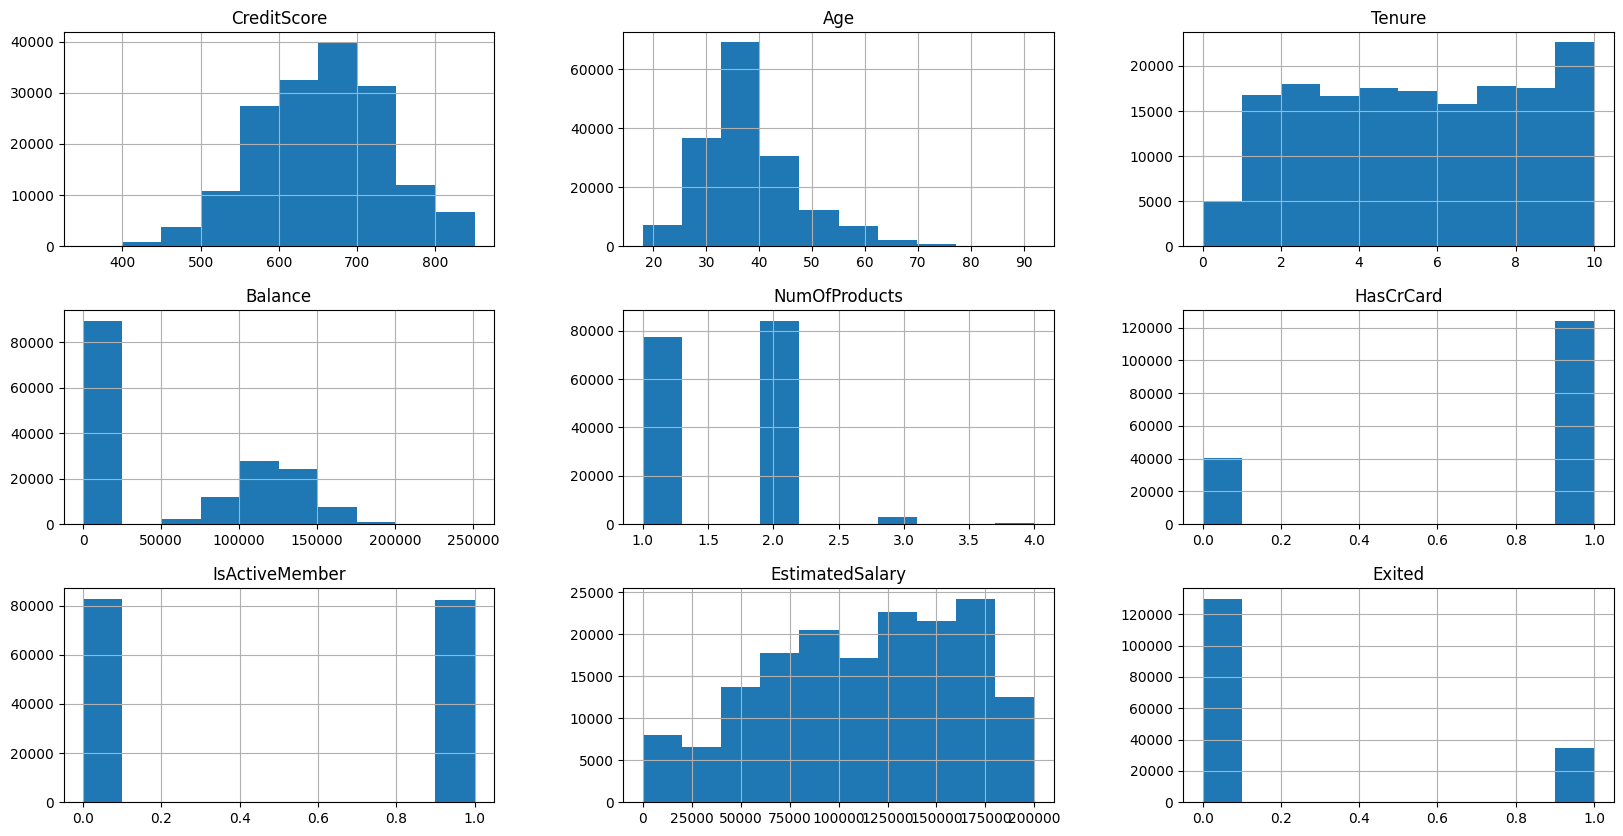

In [ ]:
train_data.hist(figsize=(20, 10))

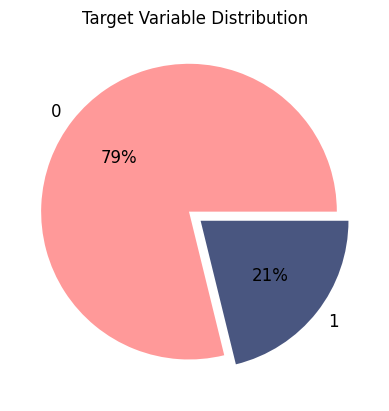

In [ ]:
#Viewing the target variable
plt.pie(
    train_data["Exited"].value_counts(),
    labels=train_data["Exited"].value_counts().index,
    textprops={"fontsize": 12},
    colors=["#ff9999", "#495680", "#de6264"],
    autopct="%.0f%%",
    explode=[0.05, 0.05],
)
plt.title("Target Variable Distribution", fontsize=12)
plt.show()

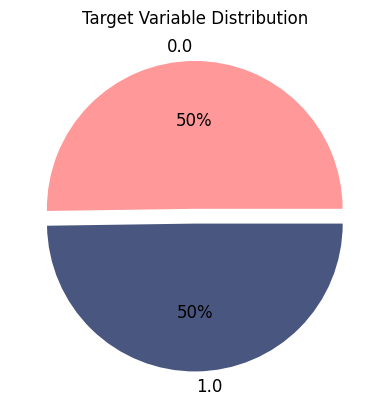

In [ ]:
plt.pie(
    train_data["IsActiveMember"].value_counts(),
    labels=train_data["IsActiveMember"].value_counts().index,
    textprops={"fontsize": 12},
    colors=["#ff9999", "#495680", "#de6264"],
    autopct="%.0f%%",
    explode=[0.05, 0.05],
)
plt.title("Target Variable Distribution", fontsize=12)
plt.show()

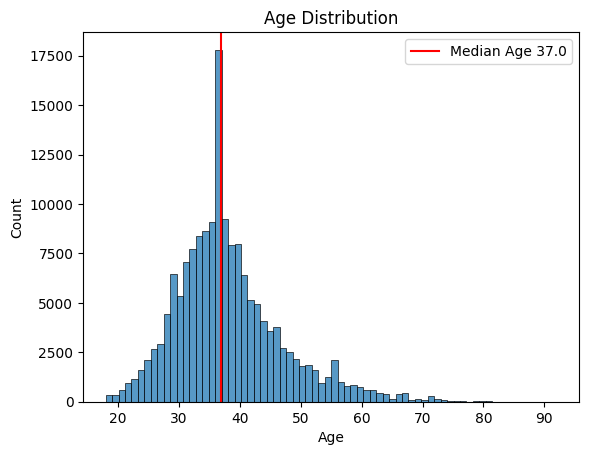

In [ ]:
sns.histplot(data=train_data,x='Age',bins=70)
plt.axvline(train_data['Age'].median(),color='r',label=f"Median Age {train_data['Age'].median()}")
plt.title('Age Distribution');plt.legend()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\668732797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['CreditScore'] = train_data['CreditScore'].replace([np.inf, -np.inf], np.nan)


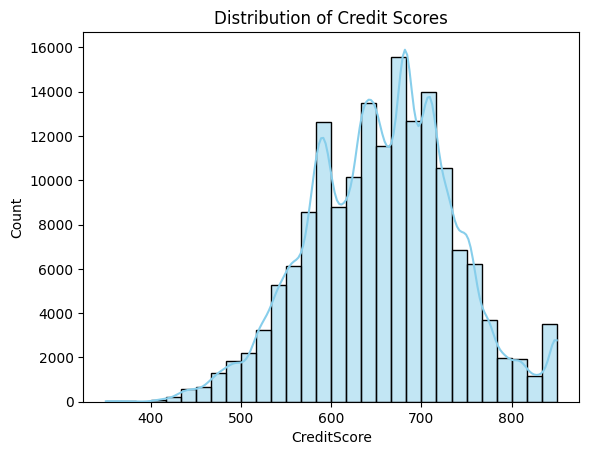

In [ ]:
train_data['CreditScore'] = train_data['CreditScore'].replace([np.inf, -np.inf], np.nan)
# Plot the histogram
fig, axs = plt.subplots(1, 1)
sns.histplot(train_data['CreditScore'], bins=30, ax=axs, kde=True, color='skyblue')
axs.set_title('Distribution of Credit Scores')
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\652074369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=train_data, ax=ax, palette='viridis')


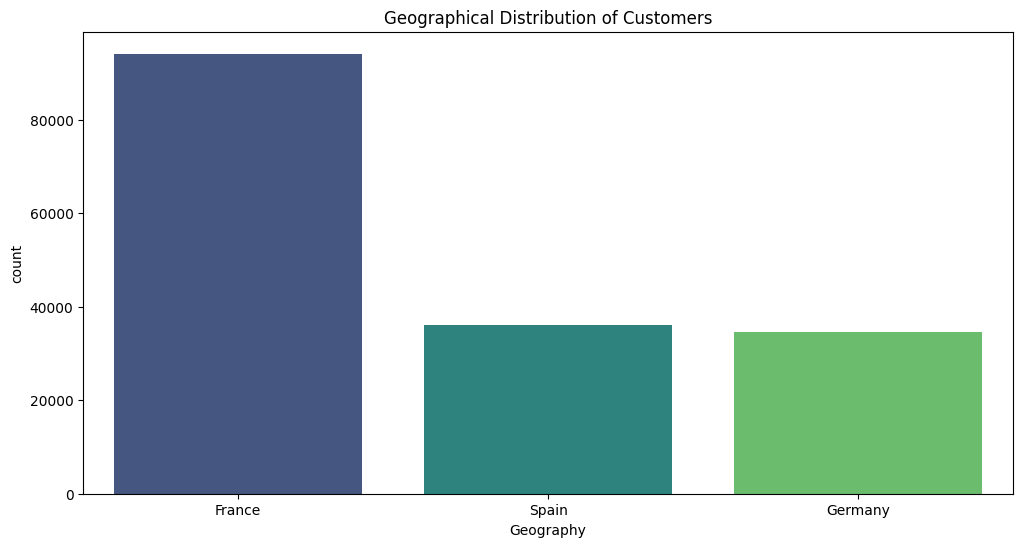

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot countplot on the single subplot
sns.countplot(x='Geography', data=train_data, ax=ax, palette='viridis')
ax.set_title('Geographical Distribution of Customers')

# Show the plot
plt.show()

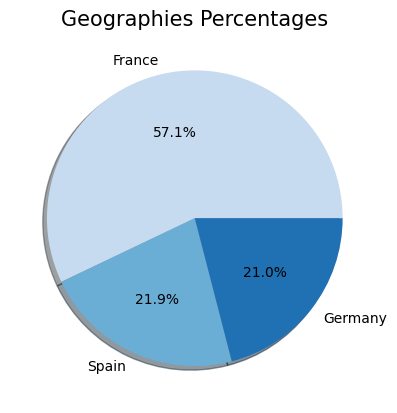

In [ ]:
sns.set_palette('Blues',3)
plt.pie(train_data['Geography'].value_counts(),labels=train_data['Geography'].value_counts().index,
        shadow=True,autopct='%1.1f%%')
plt.title('Geographies Percentages',fontsize=15)
plt.show()

- We can see that 'Age' column has the minimun value is 18 which is realistic to banks data

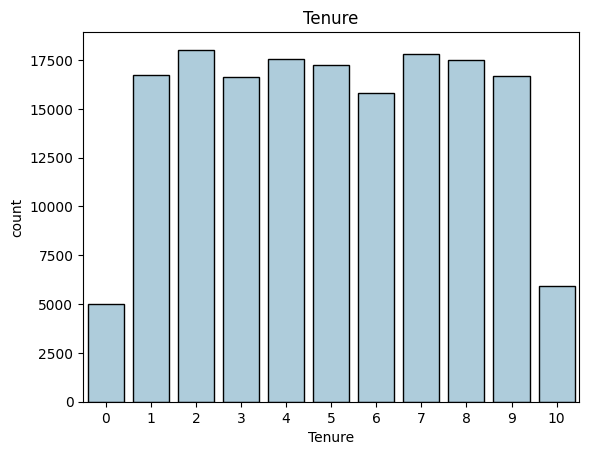

In [ ]:
sns.countplot(data=train_data,x='Tenure',color='#A6CEE3',edgecolor='black')
plt.title('Tenure');plt.show()

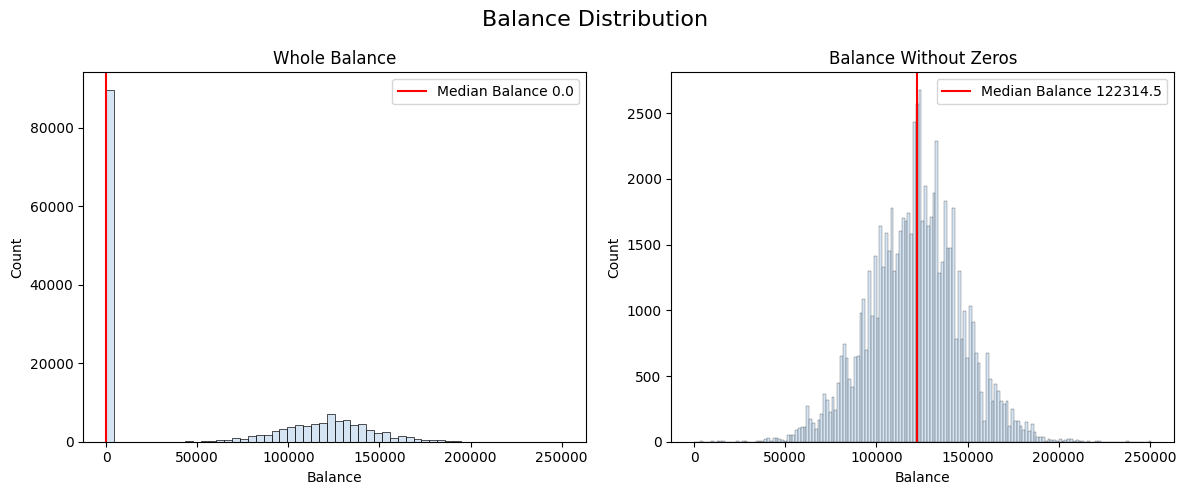

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=train_data,x='Balance',ax=ax[0],edgecolor='black')
sns.histplot(data=train_data[train_data['Balance']!=0],x='Balance',ax=ax[1],edgecolor='black')
ax[0].axvline(train_data['Balance'].median(),color='r',label=f"Median Balance {train_data['Balance'].median()}")
ax[0].set_title('Whole Balance')


kk = train_data[train_data['Balance']!=0]['Balance'].median()
ax[1].axvline(kk,color='r',label=f"Median Balance {kk}")
ax[1].set_title('Balance Without Zeros')
fig.suptitle('Balance Distribution',fontsize=16);ax[0].legend();ax[1].legend();fig.tight_layout()
plt.show()

- We seperate 'Balance' to 2 groups, which is "With zero" and "Without zero", because due to the hist map above, it can be seen that there was a huge amount of zero value.

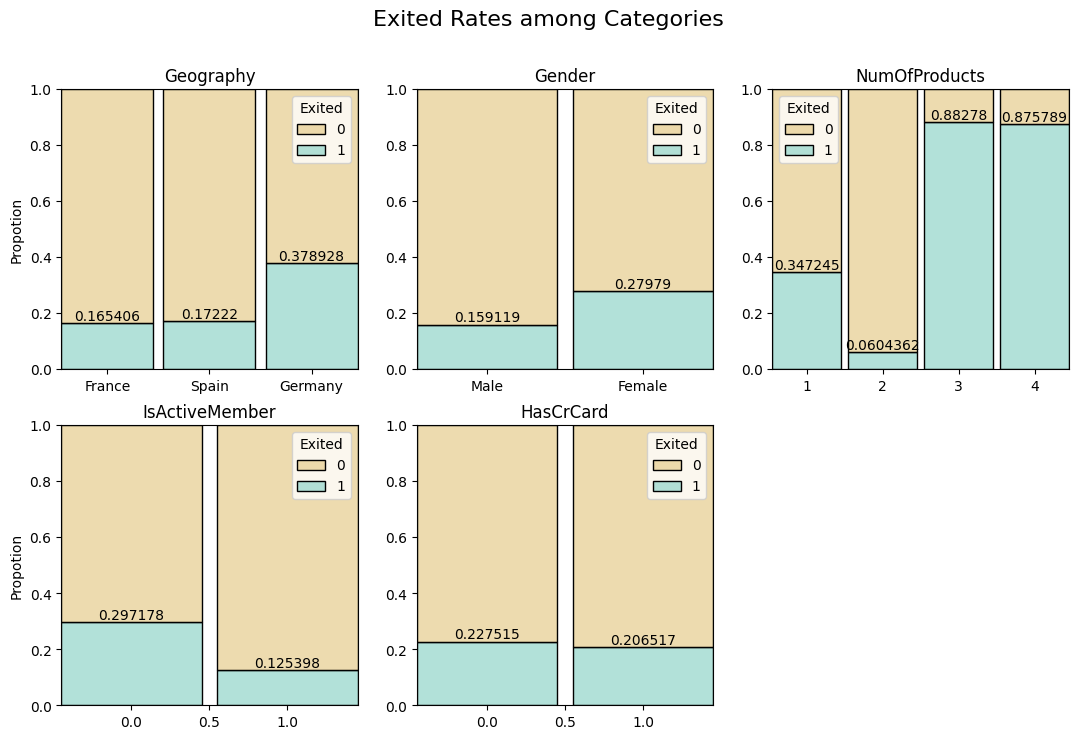

In [ ]:
plt.figure(figsize=(13, 8))
for i, c in enumerate(['Geography','Gender','NumOfProducts','IsActiveMember','HasCrCard']):
    plt.subplot(2,3,i+1)
    ax = sns.histplot(x=c, hue='Exited', data=train_data,palette='BrBG',edgecolor='black'
                 ,multiple='fill',discrete=True,shrink=.9)
    ax.bar_label(ax.containers[0])
    ax.set_xlabel('')
    ax.set_title(c)
    if i%3==0: ax.set_ylabel('Propotion')
    else: ax.set_ylabel('')

plt.suptitle('Exited Rates among Categories',size=16)
fig.tight_layout()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\1532865412.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a =sns.barplot(x='HasCrCard', y='Exited', hue='IsActiveMember', data=train_data, ci=None,edgecolor='black')


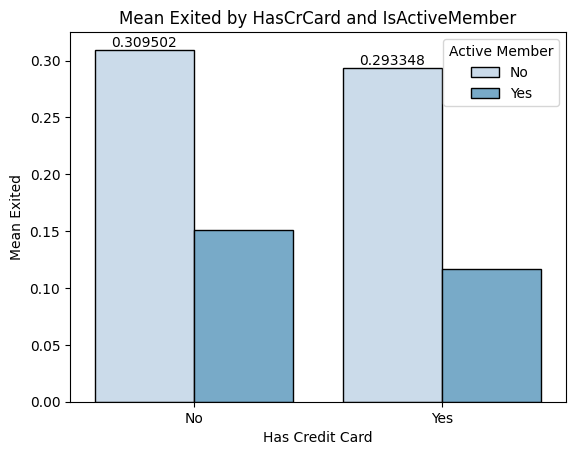

In [ ]:
a =sns.barplot(x='HasCrCard', y='Exited', hue='IsActiveMember', data=train_data, ci=None,edgecolor='black')

a.bar_label(a.containers[0])

plt.title('Mean Exited by HasCrCard and IsActiveMember')
plt.xlabel('Has Credit Card')
plt.ylabel('Mean Exited')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Active Member', loc='upper right', labels=['No', 'Yes'])

plt.show()

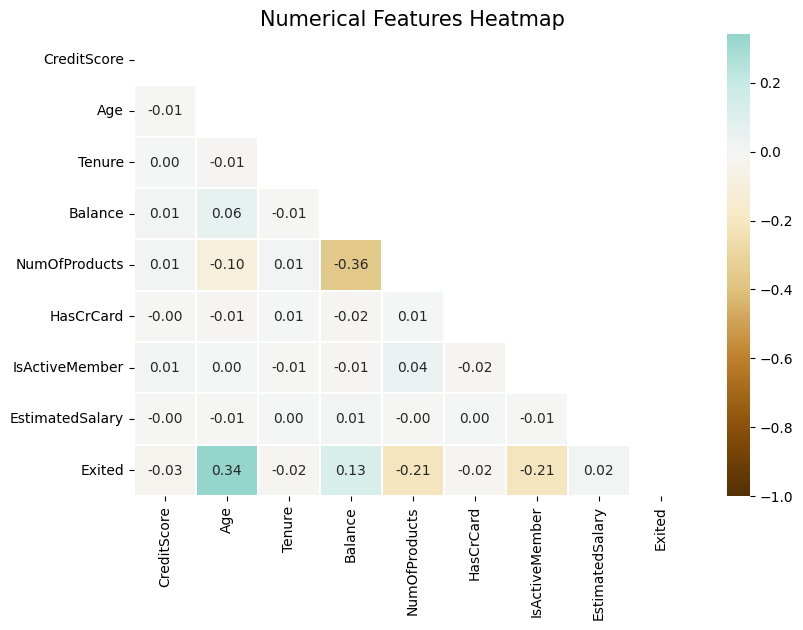

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(train_data.corr(numeric_only=True),mask=np.triu(train_data.select_dtypes(exclude=[object]).corr()),cmap='BrBG',center=0,annot=True,vmin=-1,fmt='.2f',linewidths=.1)
plt.title('Numerical Features Heatmap',size=15)
plt.show()

In [ ]:
train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


- Conclusion:
    - From the dataset, wwe can observe that only 21% off the customers in the dataset have exited.
    - Most of customer from France, and we can see that there's only 3 nation => Using getDumies to handle categorical.
    - The 'Age' column shown that minimum age is 18, which is suitable which a realistic data bank, the zero balances also need to be notice.
    - Geographically, Germany has the highest rate of exited customer, while females exhibit a higher churn rate despite their lower presence in the dataset compared to males.

## Preprocessing

In [ ]:
train_data = pd.DataFrame(pd.read_csv('data/train.csv', index_col=['id']))

In [ ]:
train_data = train_data.drop( 'CustomerId', axis=1)
train_data = train_data.drop( 'Surname', axis=1)

In [ ]:
train_data['TenureAgeRatio'] = train_data['Tenure']/train_data['Age']
train_data = train_data.drop( 'Age', axis=1)
train_data = train_data.drop('Tenure', axis=1)

In [ ]:
train_data['ActiveCrCard'] = train_data['HasCrCard']+(train_data['IsActiveMember'])
train_data = train_data.drop( 'HasCrCard', axis=1)
train_data = train_data.drop('IsActiveMember', axis=1)

In [ ]:
train_data

,CreditScore,Geography,Gender,Balance,NumOfProducts,EstimatedSalary,Exited,TenureAgeRatio,ActiveCrCard
id,,,,,,,,,
0,668,France,Male,0.00,2,181449.97,0,0.090909,1.0
1,627,France,Male,0.00,2,49503.50,0,0.030303,2.0
2,678,France,Male,0.00,2,184866.69,0,0.250000,1.0
3,581,France,Male,148882.54,1,84560.88,0,0.058824,2.0
4,716,Spain,Male,0.00,2,15068.83,0,0.151515,2.0
...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,0.00,1,131834.75,0,0.060606,2.0
165030,792,France,Male,0.00,1,131834.45,0,0.085714,0.0
165031,565,France,Male,0.00,1,127429.56,0,0.161290,2.0


In [ ]:
train_data = pd.get_dummies(train_data, columns=['Geography', 'Gender', 'NumOfProducts'])
train_data

,CreditScore,Balance,EstimatedSalary,Exited,TenureAgeRatio,ActiveCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
id,,,,,,,,,,,,,,,
0,668,0.00,181449.97,0,0.090909,1.0,True,False,False,False,True,False,True,False,False
1,627,0.00,49503.50,0,0.030303,2.0,True,False,False,False,True,False,True,False,False
2,678,0.00,184866.69,0,0.250000,1.0,True,False,False,False,True,False,True,False,False
3,581,148882.54,84560.88,0,0.058824,2.0,True,False,False,False,True,True,False,False,False
4,716,0.00,15068.83,0,0.151515,2.0,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0.00,131834.75,0,0.060606,2.0,False,False,True,True,False,True,False,False,False
165030,792,0.00,131834.45,0,0.085714,0.0,True,False,False,False,True,True,False,False,False
165031,565,0.00,127429.56,0,0.161290,2.0,True,False,False,False,True,True,False,False,False


- Handle scale and encode

In [ ]:
X, y = train_data.drop('Exited', axis=1), train_data['Exited']

In [ ]:
X

,CreditScore,Balance,EstimatedSalary,TenureAgeRatio,ActiveCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
id,,,,,,,,,,,,,,
0,668,0.00,181449.97,0.090909,1.0,True,False,False,False,True,False,True,False,False
1,627,0.00,49503.50,0.030303,2.0,True,False,False,False,True,False,True,False,False
2,678,0.00,184866.69,0.250000,1.0,True,False,False,False,True,False,True,False,False
3,581,148882.54,84560.88,0.058824,2.0,True,False,False,False,True,True,False,False,False
4,716,0.00,15068.83,0.151515,2.0,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0.00,131834.75,0.060606,2.0,False,False,True,True,False,True,False,False,False
165030,792,0.00,131834.45,0.085714,0.0,True,False,False,False,True,True,False,False,False
165031,565,0.00,127429.56,0.161290,2.0,True,False,False,False,True,True,False,False,False


In [ ]:
y

id
0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [ ]:
le = LabelEncoder()

name = list(X.columns)
type = X.dtypes

for i in range(len(type)):
    if type[i] == 'bool':
        le.fit_transform(X[name[i]])
        X[name[i]] = le.transform(X[name[i]])

X

C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\4173535069.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'bool':
C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\4173535069.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'bool':
C:\Users\Thinh\AppData\Local\Temp\ipykernel_4664\4173535069.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'bool':
C:\Users\Thinh\AppData\Local\Temp\

,CreditScore,Balance,EstimatedSalary,TenureAgeRatio,ActiveCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
id,,,,,,,,,,,,,,
0,668,0.00,181449.97,0.090909,1.0,1,0,0,0,1,0,1,0,0
1,627,0.00,49503.50,0.030303,2.0,1,0,0,0,1,0,1,0,0
2,678,0.00,184866.69,0.250000,1.0,1,0,0,0,1,0,1,0,0
3,581,148882.54,84560.88,0.058824,2.0,1,0,0,0,1,1,0,0,0
4,716,0.00,15068.83,0.151515,2.0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0.00,131834.75,0.060606,2.0,0,0,1,1,0,1,0,0,0
165030,792,0.00,131834.45,0.085714,0.0,1,0,0,0,1,1,0,0,0
165031,565,0.00,127429.56,0.161290,2.0,1,0,0,0,1,1,0,0,0


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_scaled

array([[ 0.14413459, -0.8831633 ,  1.36948561, ...,  0.9787276 ,
        -0.1335993 , -0.05372618],
       [-0.36770579, -0.8831633 , -1.25408471, ...,  0.9787276 ,
        -0.1335993 , -0.05372618],
       [ 0.2689737 , -0.8831633 ,  1.4374223 , ...,  0.9787276 ,
        -0.1335993 , -0.05372618],
       ...,
       [-1.14170832, -0.8831633 ,  0.2953656 , ..., -1.02173475,
        -0.1335993 , -0.05372618],
       [-1.27903135,  1.68830277, -0.82321653, ..., -1.02173475,
        -0.1335993 , -0.05372618],
       [ 2.41620652, -0.8831633 , -1.01392487, ..., -1.02173475,
        -0.1335993 , -0.05372618]])

## Training model

### Define neccessay function:

In [ ]:
def plot_train_test_comparison(y_pred_train, y_pred_test, model_name):
    # Calculate metrics for train and test sets
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='macro')
    recall_train = recall_score(y_train, y_pred_train, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')

    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Define metrics and values for train and test sets
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values_train = [accuracy_train, precision_train, recall_train, f1_train]
    values_test = [accuracy_test, precision_test, recall_test, f1_test]

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.bar([x - 0.2 for x in range(len(metrics))], values_train, width=0.4, label='Train', color='blue')
    plt.bar([x + 0.2 for x in range(len(metrics))], values_test, width=0.4, label='Test', color='orange')

    plt.xticks(range(len(metrics)), metrics)
    plt.title(f'Comparison of Performance Metrics between Train and Test for {model_name}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend()

    # Adding scores on top of bars
    for i, v in enumerate(values_train):
        plt.text(i - 0.2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', color='black')
    for i, v in enumerate(values_test):
        plt.text(i + 0.2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', color='black')

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_metrics(y_train, y_test, y_pred_train, y_pred_test, model_names):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    train_scores = []
    test_scores = []

    for y_pred in y_pred_train:
        acc = accuracy_score(y_train, y_pred)
        prec = precision_score(y_train, y_pred)
        rec = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)
        train_scores.append([acc, prec, rec, f1])

    for y_pred in y_pred_test:
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        test_scores.append([acc, prec, rec, f1])

    fig, axs = plt.subplots(4, figsize=(12, 18))

    for i, metric in enumerate(metrics):
        barWidth = 0.25
        bars1 = [score[i] for score in train_scores]
        bars2 = [score[i] for score in test_scores]

        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]

        axs[i].barh(r1, bars1, color='b', height=barWidth, edgecolor='grey', label='Train')
        axs[i].barh(r2, bars2, color='r', height=barWidth, edgecolor='grey', label='Test')

        axs[i].set_xlabel('Scores', fontweight='bold')
        axs[i].set_ylabel('Models', fontweight='bold')
        axs[i].set_yticks([r + barWidth for r in range(len(bars1))], model_names)
        axs[i].set_title(f'{metric} Comparison', fontweight='bold')
        axs[i].legend()

        for j, v in enumerate(bars1):
            axs[i].text(v, j, f"{v:.3f}", color='blue', va='center')
        for j, v in enumerate(bars2):
            axs[i].text(v, j + barWidth, f"{v:.3f}", color='red', va='center')

    plt.tight_layout()
    plt.show()


### Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5, test_size=0.3)

- Using GridSearchCV to find the best parameter for model

In [ ]:
# param_grid = {
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Khởi tạo mô hình Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)

# # Tạo đối tượng GridSearchCV
# grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# # Huấn luyện GridSearchCV trên dữ liệu
# grid_search.fit(X_train, y_train)

# # Lấy ra tổ hợp siêu tham số tốt nhất
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
# best_model_DecisionTree = grid_search.best_estimator_
# best_model_DecisionTree_score = best_model_DecisionTree.score(X_test, y_test)
# print("Best Model Score:", best_model_DecisionTree_score)

# dump(best_model_DecisionTree, 'model/decision_tree_model.joblib')

best_model_DecisionTree = load('model/decision_tree_model.joblib')

In [ ]:
y_pred_decisiontree_test = best_model_DecisionTree.predict(X_test)
y_pred_decisiontree_train = best_model_DecisionTree.predict(X_train)

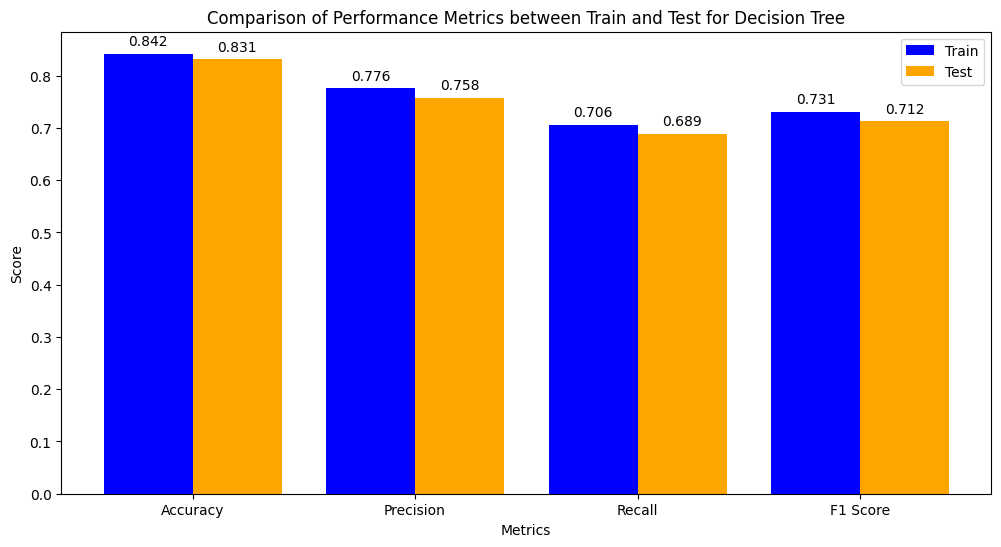

In [ ]:
plot_train_test_comparison(y_pred_decisiontree_train, y_pred_decisiontree_test, 'Decision Tree')

### Random Forest

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Khởi tạo mô hình RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Tạo đối tượng GridSearchCV với mô hình RandomForestClassifier và param_grid
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Huấn luyện GridSearch trên dữ liệu huấn luyện
# grid_search.fit(X_train, y_train)

# # In ra thông tin về các siêu tham số tốt nhất và điểm số đạt được
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy found: ", grid_search.best_score_)

# best_model_RandomForest = grid_search.best_estimator_
# best_model_RandomForest_score = best_model_RandomForest.score(X_test, y_test)
# print("Best Model Score:", best_model_Random,Forest_score)

# dump(best_model_RandonForest, 'model/random_forest_model.joblib')

best_model_RandomForest = load('model/random_forest_model.joblib')

In [ ]:
y_pred_randomforest_test = best_model_RandomForest.predict(X_test)
y_pred_randomforest_train = best_model_RandomForest.predict(X_train)

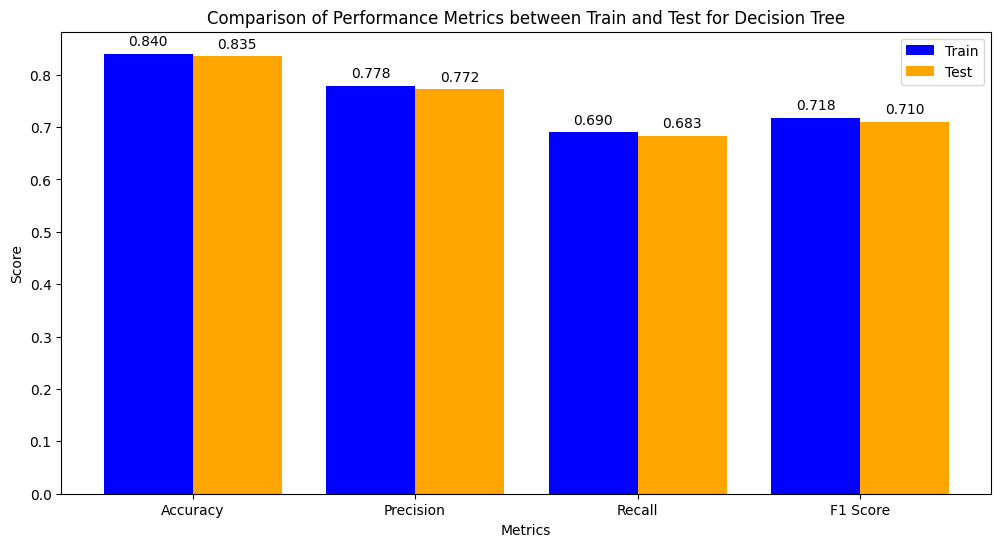

In [ ]:
plot_train_test_comparison(y_pred_randomforest_train, y_pred_randomforest_test, 'Decision Tree')

### Catboost Algorithm

In [ ]:
# from catboost import CatBoostClassifier

# modelCatboost = CatBoostClassifier()
# modelCatboost.fit(X_train, y_train)

# dump(modelCatboost, 'model/catboost_model.joblib')

modelCatboost = load('model/catboost_model.joblib')


In [ ]:
y_pred_Catboost_test = modelCatboost.predict(X_test)
y_pred_Catboost_train = modelCatboost.predict(X_train)

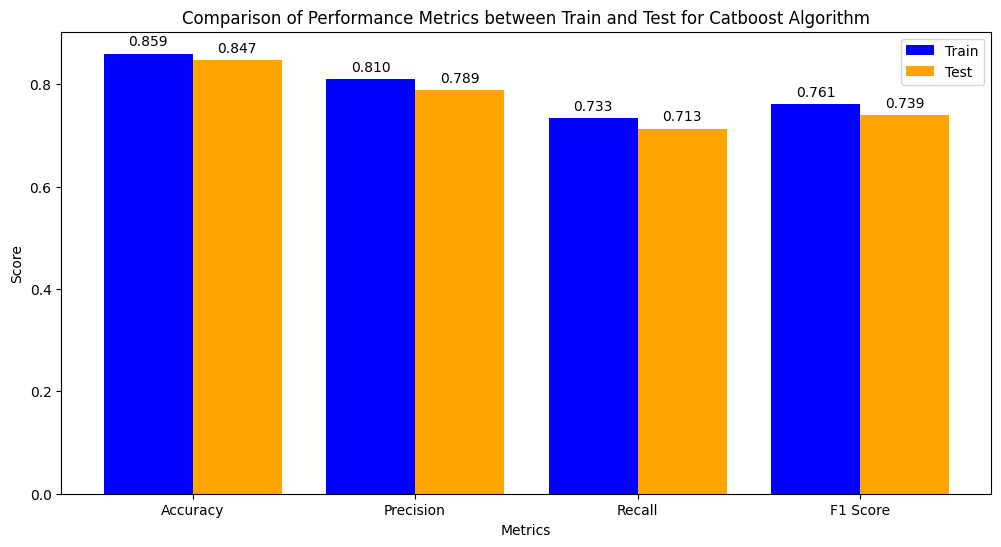

In [ ]:
plot_train_test_comparison(y_pred_Catboost_train, y_pred_Catboost_test, 'Catboost Algorithm')

### KNN

In [ ]:
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# # Initialize KNN model
# knn = KNeighborsClassifier()

# # Initialize GridSearchCV with the KNN model and parameter grid
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Train GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best accuracy found
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy found: ", grid_search.best_score_)

# # Get the best KNN model
# best_model_KNN = grid_search.best_estimator_

# # Evaluate the best model on the test set
# best_model_KNN_score = best_model_KNN.score(X_test, y_test)
# print("Best Model Score:", best_model_KNN_score)

# dump(best_model_KNN, 'model/KNN_model.joblib')

best_model_KNN = load('model/KNN_model.joblib')

In [ ]:
y_pred_KNN_test = best_model_KNN.predict(X_test)
y_pred_KNN_train = best_model_KNN.predict(X_train)

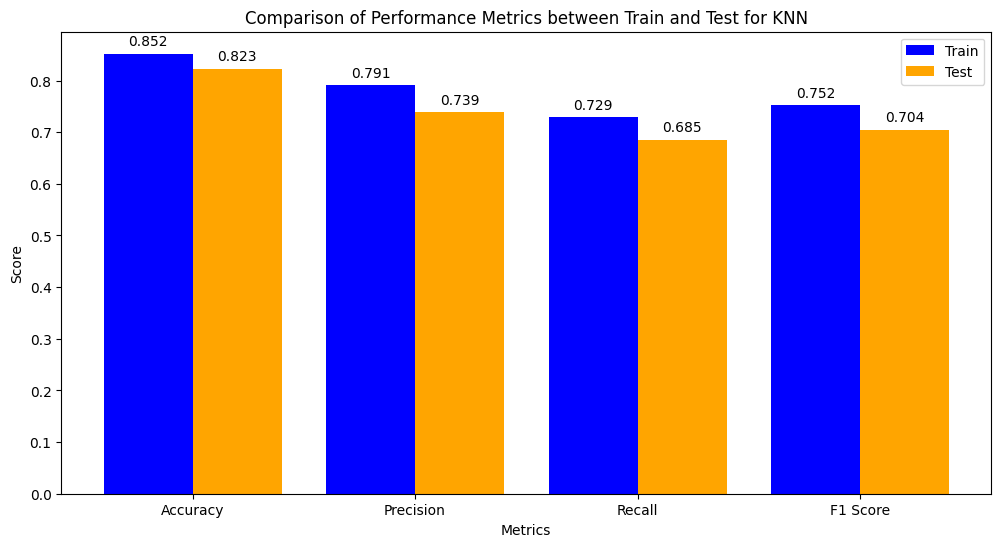

In [ ]:
plot_train_test_comparison(y_pred_KNN_train, y_pred_KNN_test, 'KNN')

### Multilayer Perceptron Neural Network

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', alpha=0.01, random_state=42)
# mlp.fit(X_train, y_train)

# dump(mlp, 'model/MLP_model.joblib')
mlp = load('model/MLP_model.joblib')

In [ ]:
y_pred_MLP_test = mlp.predict(X_test)
y_pred_MLP_train = mlp.predict(X_train)

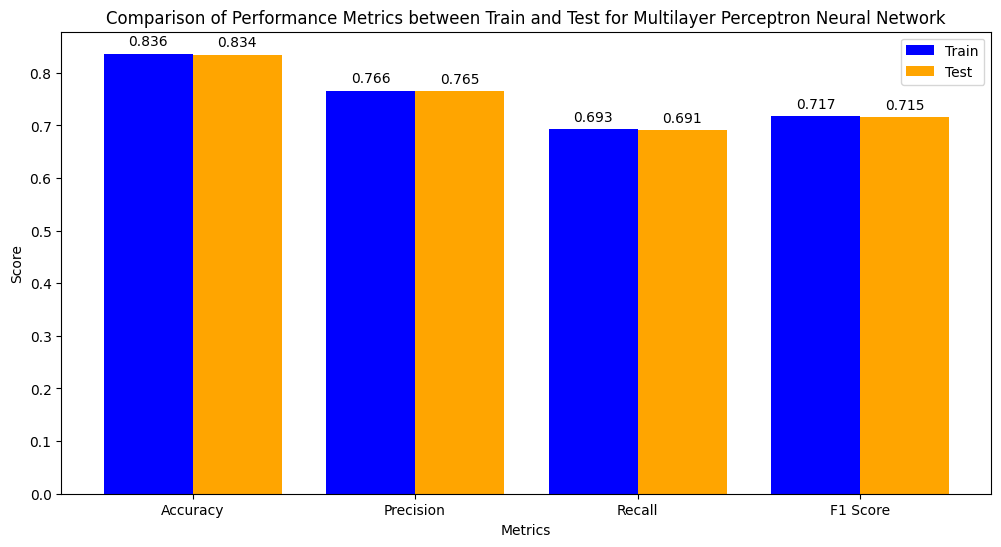

In [ ]:
plot_train_test_comparison(y_pred_MLP_train, y_pred_MLP_test, 'Multilayer Perceptron Neural Network')

## Conclusion

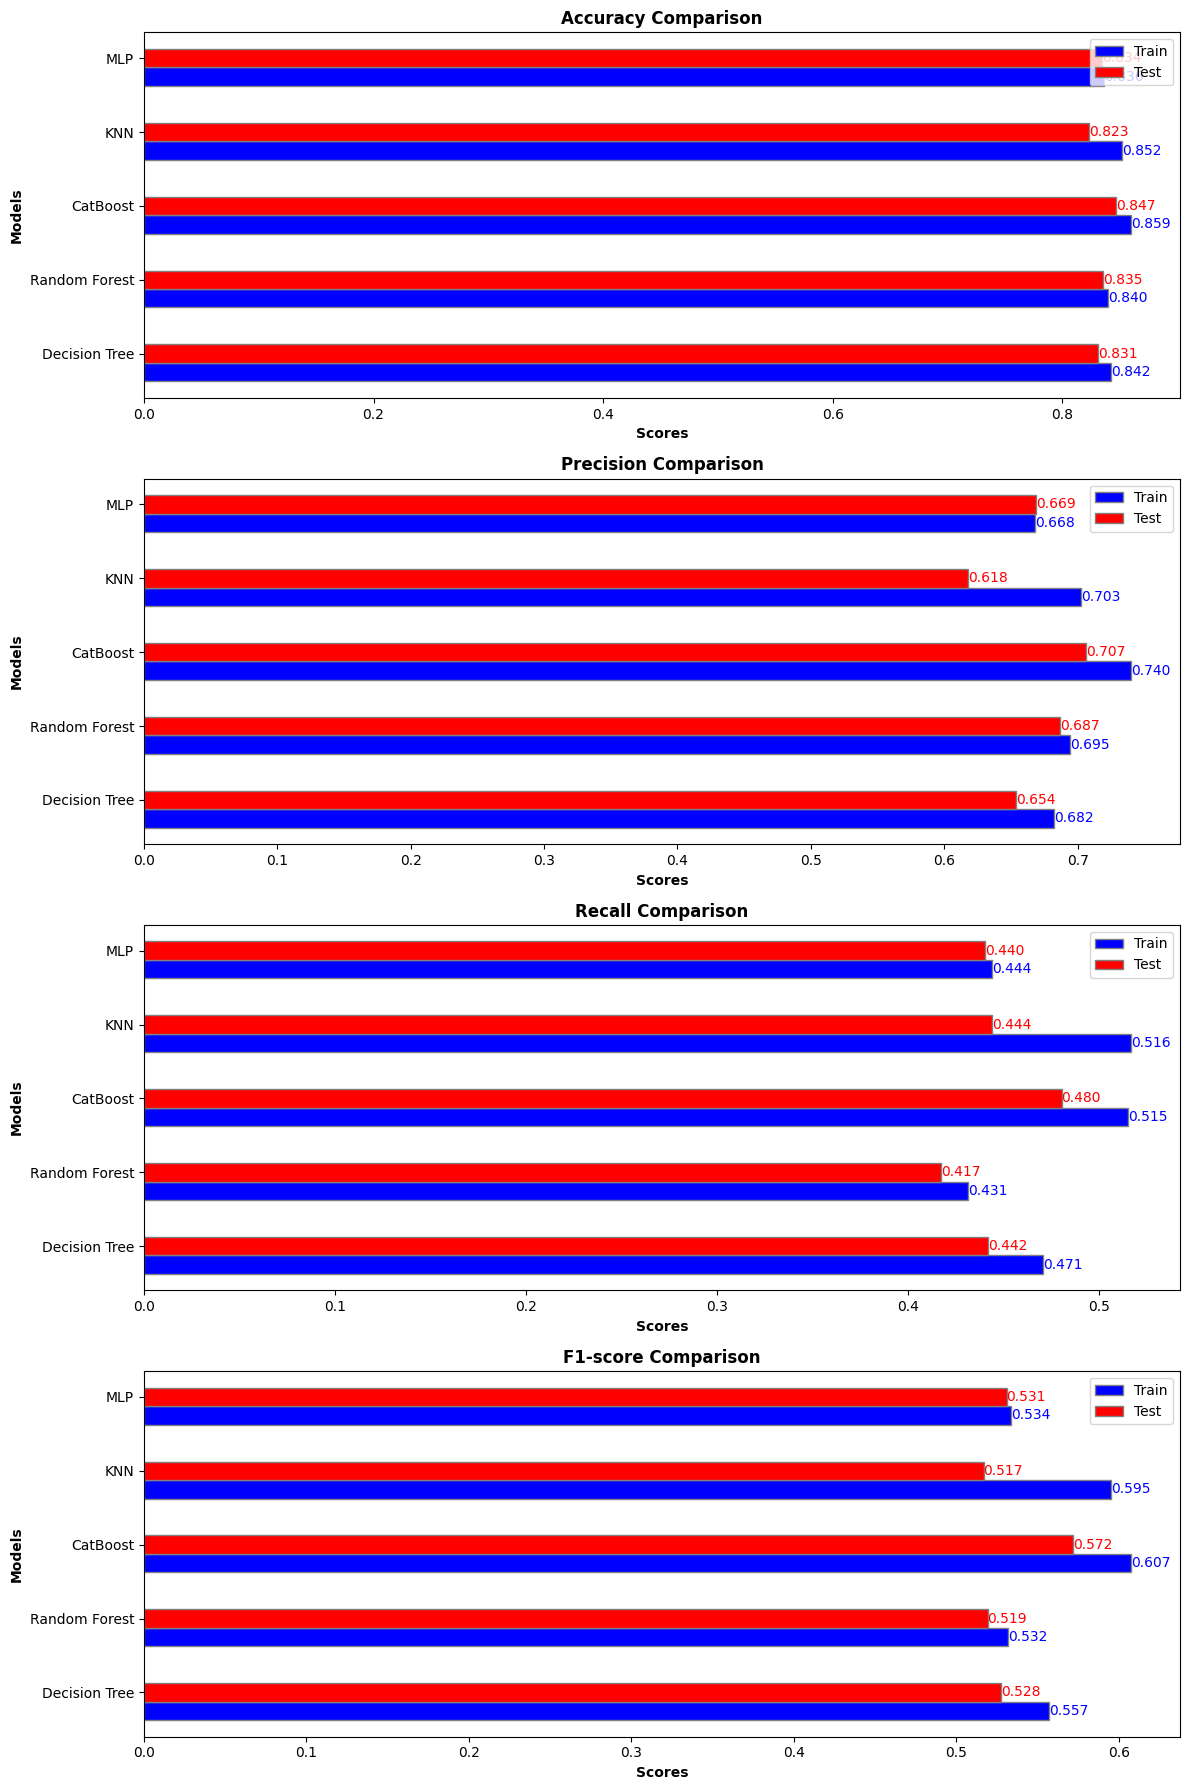

In [ ]:

y_pred_train = [y_pred_decisiontree_train, y_pred_randomforest_train, y_pred_Catboost_train, y_pred_KNN_train, y_pred_MLP_train]
y_pred_test = [y_pred_decisiontree_test, y_pred_randomforest_test, y_pred_Catboost_test, y_pred_KNN_test, y_pred_MLP_test]
model_names = ['Decision Tree', 'Random Forest', 'CatBoost', 'KNN', 'MLP']

plot_metrics(y_train, y_test, y_pred_train, y_pred_test, model_names)